# Homework 2

Do the programing part of Homework 2 in this notebook. Predefined are function *stubs*. That is, the name of the function and a basic body is predefined. You need to modify the code to fulfil the requirements of the homework.

In [1]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# If you're using Firefox, remove one or both # on the commands below.
# note these `%`-commands are not actually Python commands. They are Jupyter-notebook-specific commands.
#%matplotlib notebook
#%matplotlib notebook

## Network SIR Model

### 1-2 One population

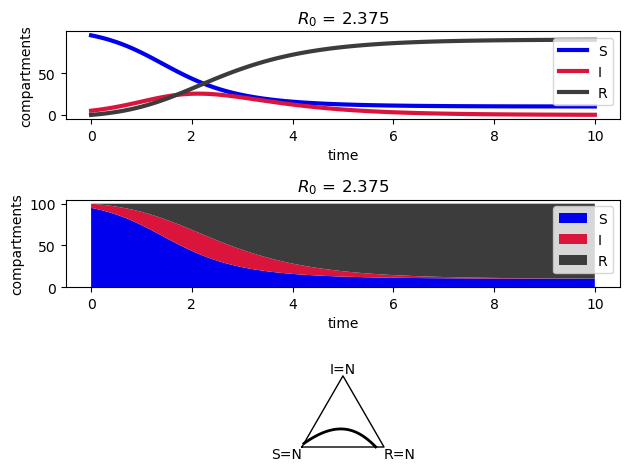

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def SIR_rhs(x, t, param): # Note the order of arguments for odeint
    S = x[0]
    I = x[1]
    R = x[2]

    dxdt = np.array([
        -param['beta'] * S * I,
        param['beta'] * S * I - param['gamma'] * I,
        param['gamma'] * I
    ])
    return dxdt




# parameters
param = {
    'N': 100,         # total population size
    'beta': 2.5 / 100,  # infection rate, 1/beta = typical time between contacts
    'gamma': 1.0       # recovery rate, 1/gamma = typical time until recovery
}

# final time
tf = 10

# initial condition
x0 = param['N'] * np.array([0.950, 0.050, 0.000])

R0 = param['beta'] * x0[0] / param['gamma']

# simulate
t = np.linspace(0, tf, 100)  # Create a time vector for odeint
x = odeint(SIR_rhs, x0, t, args=(param,)) # Solve the ODEs

S = x[:, 0]
I = x[:, 1]
R = x[:, 2]

# plot
clrs = np.array([[0, 0, 240], [220, 20, 60], [60, 60, 60]]) / 256

fig, axs = plt.subplots(3, 1)

# time courses
axs[0].plot(t, S, color=clrs[0], linewidth=3)
axs[0].plot(t, I, color=clrs[1], linewidth=3)
axs[0].plot(t, R, color=clrs[2], linewidth=3)
axs[0].legend(['S', 'I', 'R'])
axs[0].set_xlabel('time')
axs[0].set_ylabel('compartments')
axs[0].set_title(f'$R_0$ = {R0}')


# time courses - using stackplot
axs[1].stackplot(t, S, I, R, colors=clrs, labels=['S', 'I', 'R'])
axs[1].legend(loc='upper right') # Adjust legend location as needed
axs[1].set_xlabel('time')
axs[1].set_ylabel('compartments')
axs[1].set_title(f'$R_0$ = {R0}')

# ternary plot
axs[2].plot(0.5 * (2 * R + I) / param['N'], np.sqrt(3) / 2 * I / param['N'], '-k', linewidth=2)
axs[2].plot([0, 0.5, 1, 0], [0, np.sqrt(3) / 2, 0, 0], '-k', linewidth=1)
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_xlim([-0.1, 1.1])
axs[2].set_ylim([-0.1, np.sqrt(3) / 2 + 0.1])
axs[2].set_aspect('equal')

axs[2].text(0.5, np.sqrt(3) / 2, 'I=N', verticalalignment='bottom', horizontalalignment='center')
axs[2].text(1, 0, 'R=N', verticalalignment='top', horizontalalignment='left')
axs[2].text(0, 0, 'S=N', verticalalignment='top', horizontalalignment='right')

axs[2].spines['top'].set_visible(False) #added to remove the top border
axs[2].spines['right'].set_visible(False) #added to remove the right border
axs[2].spines['bottom'].set_visible(False) #added to remove the bottom border
axs[2].spines['left'].set_visible(False) #added to remove the left border

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()


**Q1**

use Python’s `odeint` function  to numerically solve the standard **SIR** model equations:

\[
\begin{cases}
\dfrac{dS}{dt} = -\,\beta\,S\,I, \\[6pt]
\dfrac{dI}{dt} = \beta\,S\,I - \gamma\,I, \\[6pt]
\dfrac{dR}{dt} = \gamma\,I.
\end{cases}
\]

- $$(\beta)$$ is the infection rate (or “contact rate”), and $$(\gamma = 1)$$ in the code represents the recovery rate, meaning the typical recovery time is $$(1/\gamma = 1)$$ time unit.  
- The parameter `param['N'] = 100` corresponds to the total population \(N\). The initial condition `x0 = [0.95, 0.05, 0]` means that at $$(t=0)$$, 95% of the population is susceptible (\(S\)), 5% is infected (\(I\)), and 0% has recovered (\(R\)).  
- The function `SIR_rhs` calculates the time derivatives \((dS/dt, dI/dt, dR/dt)\) at each step given the current \((S,I,R)\). The `odeint` solver then integrates these equations over the specified time range.  
- Because $$(\gamma = 1)$$, we can interpret one unit of time as the average recovery time for an infected individual. The model can use either raw population counts or fractions (in this case, it’s effectively fractions of the total).  
- Finally, the code produces three types of plots to illustrate how \(S\), \(I\), and \(R\) change over time and in phase space (line plots, stacked‐area plots, and a ternary diagram), clarifying the dynamic evolution of the three compartments.

---

**Q2**

1. **Reducing $$(\beta)$$**  
   - Lowering $$(\beta)$$ directly reduces the basic reproduction number $$(R_0 = \frac{\beta\,S_0}{\gamma})$$. With a smaller $$(R_0)$$, each infected individual generates fewer new infections.  
   - As a result, the **peak** number of infections (the maximum \(I\)) is **lower**, and the **final** number of recovered individuals is also smaller because the overall outbreak is less intense.

2. **Increasing the Initial Number of Infectious Individuals (while decreasing Susceptibles accordingly)**  
   - If the total population $$(N)$$ stays the same but you start with more infectious individuals, then $$(S_0)$$ (the initial fraction of susceptibles) is smaller.  
   - Since $$(R_0)$$ is often approximated by $$(\beta\,S_0/\gamma)$$, having fewer susceptibles at the start effectively lowers the initial reproduction potential.  
   - In practice, the outbreak may peak **earlier** and burn through the smaller susceptible pool more quickly. This typically **shortens** the outbreak and **reduces** its total size (fewer individuals become infected overall).  

In summary, **both reducing $$(\beta)$$** and **reducing the initial susceptible fraction** lead to a smaller overall epidemic, with a lower peak and a faster decline to zero infections.


### 3-7 Multiple populations

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### Define the RHS of the system

In [5]:
def multipopulation_sir_rhs(x, t, param):
    N = param['N']
    beta = param['beta']
    gamma = param['gamma']
    TS = param['TS']
    TI = param['TI']
    TR = param['TR']
    num_populations = param['num_populations']

    dxdt = np.zeros_like(x)

    for i in range(num_populations):
        S = x[i * 3]
        I = x[i * 3 + 1]
        R = x[i * 3 + 2]

        dSdt = -beta[i] * S * I  # Use beta[i] and N[i]
        dIdt = beta[i] * S * I - gamma[i] * I  # Use gamma[i] and N[i]
        dRdt = gamma[i] * I  # Use gamma[i]

        # Travel component
        for j in range(num_populations):
            if i != j:  # Don't travel to the same population
                dSdt += TS[j, i] * x[j * 3] - TS[i, j] * S  # Use N[i] and N[j]
                dIdt += TI[j, i] * x[j * 3 + 1] - TI[i, j] * I  # Use N[i] and N[j]
                dRdt += TR[j, i] * x[j * 3 + 2] - TR[i, j] * R  # Use N[i] and N[j]

        dxdt[i * 3] = dSdt
        dxdt[i * 3 + 1] = dIdt
        dxdt[i * 3 + 2] = dRdt

    return dxdt

#### Parameters, initial values, travelling matrix

In [6]:

# Parameters
num_populations = 4  # number of different populations

# Define N, beta, and gamma as arrays
N = np.array([100, 100, 100, 100])  # Population size for each subpopulation
beta = np.array([2, 0.5, 2, 1.5])/N  # Infection rate for each subpopulation
gamma = np.array([1.0, 1.0, 1.0, 1.0])  # Recovery rate for each subpopulation
tf = 20  # Final time

# Initial conditions (all populations start with the same infection rate)
x0 = np.zeros([num_populations, 3])
x0[:, 0] = N
x0[-1, :] = N[-1] * np.array([0.95, 0.05, 0])

R0 = beta * x0[:, 0] / gamma #per population R0

x0 = x0.ravel()

# Set up the travel matrices (same as before)
nu = 0.3  # travel rate

Tall = np.ones((num_populations, num_populations))
Tnone = np.zeros((num_populations, num_populations))
Tchain = np.diag(np.ones(num_populations - 1), 1) + np.diag(np.ones(num_populations - 1), -1)
Tonly1 = np.block([[0, np.ones(num_populations - 1)], [np.ones((num_populations - 1, 1)), np.zeros((num_populations - 1, num_populations - 1))]])
Tcir = np.diag(np.ones(num_populations - 1), 1)
Tcir[num_populations - 1, 0] = 1

TS = nu * Tall
TI = nu * Tnone
TR = nu * Tnone


#### See the current travelling scheme

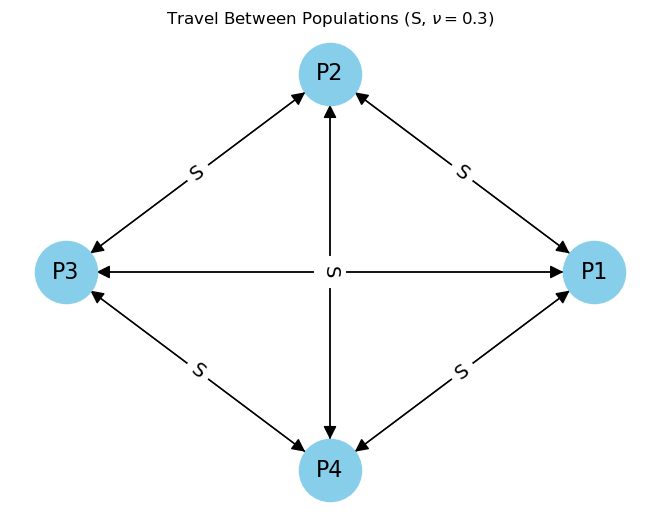

<Figure size 640x480 with 0 Axes>

In [7]:
import networkx as nx


for compartment, matrix, nu_val in [("S", TS, nu), ("I", TI, nu), ("R", TR, nu)]:
    if np.any(matrix):  # Check if the matrix has any non-zero elements
        G = nx.DiGraph();  # Create a directed graph for each compartment

        for i in range(num_populations):
            G.add_node(f"P{i+1}")

        for i in range(num_populations):
            for j in range(num_populations):
                if i != j and matrix[i, j] > 0:  # Add edge only if travel exists
                    G.add_edge(f"P{i+1}", f"P{j+1}", label=f"{compartment}")

        if G.number_of_edges() > 0:  # Only plot if there are edges
            pos = nx.circular_layout(G)
            nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=16, arrowsize=20); # Straight arrows by default

            edge_labels = nx.get_edge_attributes(G, 'label')

            label_pos = {}

            for source, target in G.edges():
                count = 0
                for key in G[source][target]:
                    label = edge_labels.get((source, target, key))
                    if label:
                        x_source, y_source = pos[source]
                        x_target, y_target = pos[target]

                        x_mid = (x_source + x_target) / 2
                        y_mid = (y_source + y_target) / 2

                        angle = np.arctan2(y_target - y_source, x_target - x_source)

                        offset_magnitude = 0.15  # Adjust for offset distance
                        offset_x = offset_magnitude * np.cos(angle + np.pi / 2) * (G.number_of_edges(source, target) - 1)
                        offset_y = offset_magnitude * np.sin(angle + np.pi / 2) * (G.number_of_edges(source, target) - 1)

                        label_pos[(source, target, key)] = (x_mid + offset_x, y_mid + offset_y)
                        count += 1

            for edge, label in edge_labels.items():
                nx.draw_networkx_edge_labels(G, pos, {edge: label}, font_size=14)

            plt.title(f"Travel Between Populations ({compartment}, $\\nu=${nu_val})");
            plt.show();

plt.tight_layout();
plt.show();

#### Solve the system and plot solution

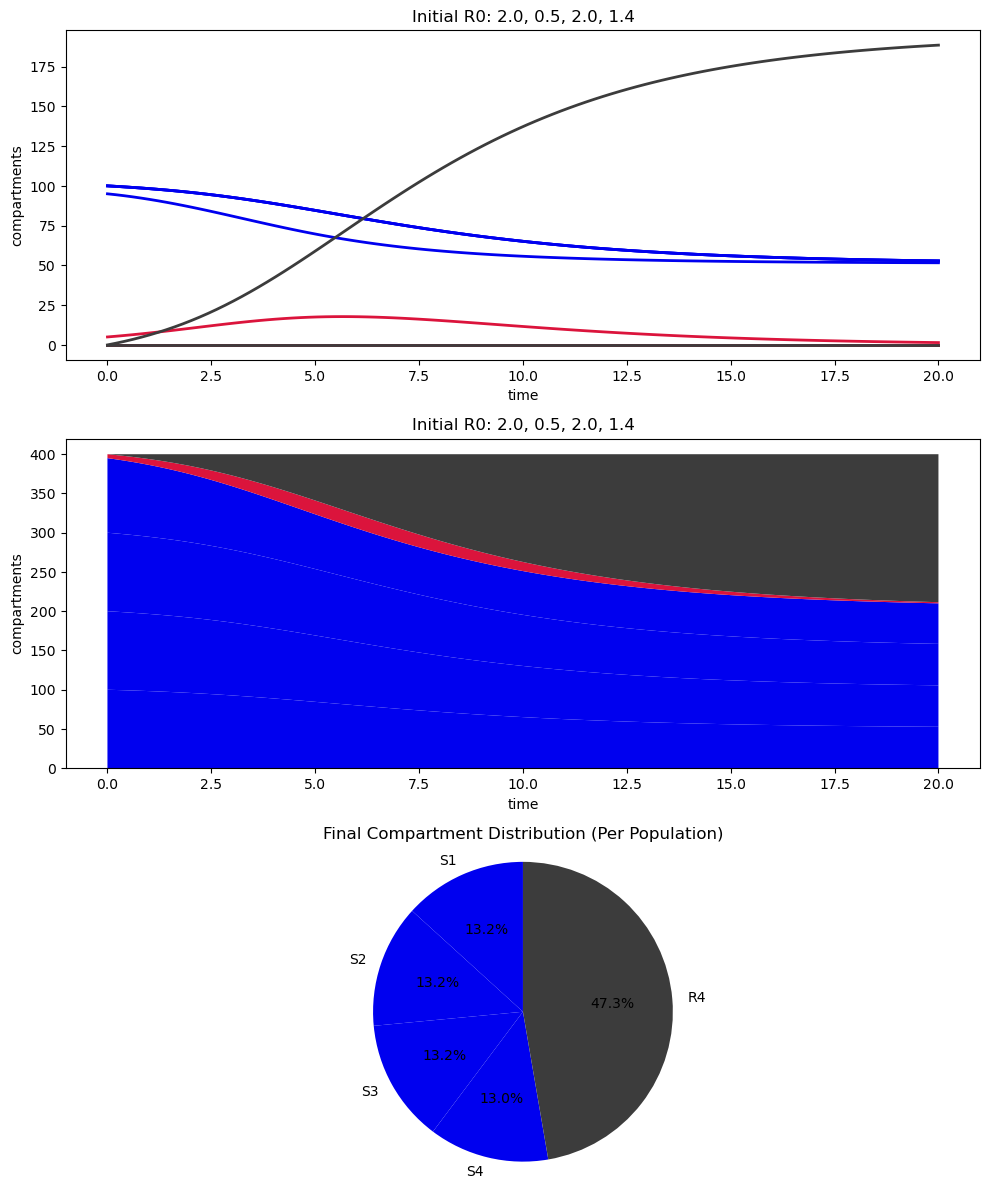

Final Distribution (% of Global Population)
---------------------------------------
i    S     I     R
 1  52.8   0.0   0.0
 2  52.8   0.0   0.0
 3  52.8   0.0   0.0
 4  51.6   1.5 188.5
---------------------------------------
    52.5   0.4  47.1


In [8]:
param = {'N': N, 'beta': beta, 'gamma': gamma, 'TS': TS, 'TI': TI, 'TR': TR, 'num_populations': num_populations}

# Simulate (same as before)
t = np.linspace(0, tf, 100)
x = odeint(multipopulation_sir_rhs, x0, t, args=(param,))

# Reshape the solution for easier plotting (same as before)
S = x[:, 0::3].reshape(len(t), num_populations)  # Every 3rd element starting at 0 is S
I = x[:, 1::3].reshape(len(t), num_populations)  # Every 3rd element starting at 1 is I
R = x[:, 2::3].reshape(len(t), num_populations)  # Every 3rd element starting at 2 is R

# Plotting (same as before)
clrs = np.array([[0, 0, 240], [220, 20, 60], [60, 60, 60]]) / 256

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # Add space for the pie chart

# Time series plots (as before)
for i in range(num_populations):
    axs[0].plot(t, S[:, i], color=clrs[0], linewidth=2, label=f'S{i+1}')
    axs[0].plot(t, I[:, i], color=clrs[1], linewidth=2, label=f'I{i+1}')
    axs[0].plot(t, R[:, i], color=clrs[2], linewidth=2, label=f'R{i+1}')
axs[0].set_xlabel('time')
axs[0].set_ylabel('compartments')
# axs[0].legend()
# Format R0 values for the title
r0_strings = [f"{r:.1f}" for r in R0]  # Format each R0 to one decimal place
r0_title = ", ".join(r0_strings)  # Join the strings with commas

axs[0].set_title(f'Initial R0: {r0_title}')  # Use the formatted string in the title


colors = [clrs[0]] * num_populations + [clrs[1]] * num_populations + [clrs[2]] * num_populations

axs[1].stackplot(t, S.T, I.T, R.T, colors=colors, labels=['S', 'I', 'R'])  # Transpose S, I, R
axs[1].set_xlabel('time')
axs[1].set_ylabel('compartments')
# axs[1].legend()
axs[1].set_title(f'Initial R0: {r0_title}')  # Use the formatted string in the title


# Pie chart of final configuration (with per-population labels)
total_population = N.sum()
final_S = S[-1, :]
final_I = I[-1, :]
final_R = R[-1, :]

sizes = np.concatenate([final_S, final_I, final_R])
labels = []
for i in range(num_populations):
    labels.append(f'S{i+1}')
for i in range(num_populations):
    labels.append(f'I{i+1}')
for i in range(num_populations):
    labels.append(f'R{i+1}')

colors = [clrs[0]] * num_populations + [clrs[1]] * num_populations + [clrs[2]] * num_populations

# Filter out small values and corresponding labels/colors
threshold = 0.01 * total_population  # 1% of total population as threshold  (adjust as needed)
filtered_sizes = []
filtered_labels = []
filtered_colors = []

for i in range(len(sizes)):
    if sizes[i] > threshold:
        filtered_sizes.append(sizes[i])
        filtered_labels.append(labels[i])
        filtered_colors.append(colors[i])

axs[2].pie(filtered_sizes, labels=filtered_labels, colors=filtered_colors, autopct='%1.1f%%', startangle=90)
axs[2].axis('equal')
axs[2].set_title('Final Compartment Distribution (Per Population)')

plt.tight_layout()
plt.show()


# Display the final global distribution in a table

print("Final Distribution (% of Global Population)")
print("---------------------------------------")  # Separator line
print("i    S     I     R")

for i in range(num_populations):
    print(f"{i+1:2d} {final_S[i]/N[i]*100:5.1f} {final_I[i]/N[i]*100:5.1f} {final_R[i]/N[i]*100:5.1f}")  # Formatted output

print("---------------------------------------")  # Separator line
print(f"   {final_S.sum()/total_population*100:5.1f} {final_I.sum()/total_population*100:5.1f} {final_R.sum()/total_population*100:5.1f}") # Global totals



**Q3**

1. **Separate Compartments per Population:**  
   Each sub‐population has its own $$(S_i), (I_i), and (R_i)$$, with potentially different $$(\beta_i)$$ (infection rates) and $$(\gamma_i)$$ (recovery rates).

2. **Standard SIR within Each Population:**  
   In a loop, we compute the usual SIR terms for each population, i.e.,  
   $$[
     \frac{dS_i}{dt} = -\,\beta_i\,S_i\,I_i, \quad
     \frac{dI_i}{dt} = \beta_i\,S_i\,I_i - \gamma_i\,I_i, \quad
     \frac{dR_i}{dt} = \gamma_i\,I_i.
   ]$$

3. **Add Travel/Transport Terms:**  
   We then include the movement of \(S\), \(I\), and \(R\) between populations using matrices \(T_S, T_I, T_R\). For example, the model allows susceptible individuals to leave population \(i\) at some rate and enter population \(j\), and similarly for infected and recovered compartments. This results in a set of coupled ODEs describing multi‐population disease spread.

When the code runs:
- The **top panel** shows time series plots of \(S, I, R\) for each sub‐population.  
- A **pie chart animation** may show, at discrete time points, how each sub‐population’s \((S_i, I_i, R_i)\) compares as fractions of the total global population.  
- Finally, the code outputs a **table** giving the global or per‐population distributions at the end of the simulation.

---

**Q4**

1. **Set All Travel Rates to Zero (`Tnone`)**  
   This means there is no movement among populations: each one is isolated and evolves purely according to its own SIR equations. As a result, the sub‐populations do **not** influence each other, and each population’s solution matches the standard single‐population SIR model (as in Exercise 1 of the first part).

2. **Then Apply Various Travel Structures**  
   By assigning the travel matrices according to, for example, a circle (ring) structure, a chain, or an all‐to‐all connection, we enable flow of individuals among populations.  
   - In an all‐to‐all network, the infection can move freely between all populations, potentially causing more synchronized outbreaks.  
   - In a chain or ring network, the disease progresses step by step from one population to adjacent ones, often creating a visible time delay as it spreads.

---

**Q5**

Below are two examples of assumptions implicit in the travel modeling of Eqs. (1)–(3):

1. **Constant Travel Rates Independent of Epidemic Conditions:**  
   We typically assume fixed matrices \(T_S, T_I, T_R\), meaning individuals of type S/I/R travel at a constant rate regardless of how severe the epidemic is or how the population sizes change. Realistically, disease outbreaks might reduce travel, but the basic model does not capture that.

2. **Well‐Mixed Assumption within Each Population:**  
   Within a single sub‐population, we still assume homogeneous mixing (everyone is equally likely to contact everyone else in that sub‐population). There is no further stratification or spatial structure within a population.

---

**Q6**

**When only susceptibles can travel** (i.e., \(I\) and \(R\) do not move among populations), how do the final numbers of recoveries compare to a single‐population scenario?

- Since susceptibles can move but infected individuals remain where they are, some populations may receive a continuous inflow of uninfected individuals, effectively “feeding” the infection.  
- In a highly connected network, the overall fraction of the population eventually infected can be larger than in the isolated case, because susceptible individuals spread out and may encounter infected populations more easily.  
- The exact outcomes depend on the network topology, initial conditions, and parameter values (\(\beta, \gamma\)). We can analyze each population’s basic reproduction number \(R_0\) or look at the global dynamics to understand how the infection eventually distributes itself.

---

**Q37**

**When infectives (I) can also travel, how does that spread the disease?** Consider four populations with the usual \(\beta\) and \(\gamma\) but no travel for S or R. Now **reduce** the base travel rate \(\nu\) to 0.01:

- Even though the infectives are moving slowly (\(\nu = 0.01\)), they can still carry the infection from one sub‐population to another, gradually causing outbreaks in each connected population.  
- If one population (say population 3) has a lower \(R_0\), it is less prone to sustain large outbreaks **on its own**, but ongoing inflow of infectives from other populations can still spark local transmission episodes.  
- In a **one‐direction circular** network, the disease will tend to move in a fixed sequence around the ring, creating **time delays** between outbreaks in successive populations. Observing these delays or differences in outbreak timing can reveal the underlying travel structure and connectivity.  
- Ultimately, if the network is strongly connected and there is enough time, the disease is likely to spread through all sub‐populations, though with variations in peak size and timing in each population.


## 8-14 Approximating the temperature of a two-dimensional slab

$$u_{xx} + u_{yy} = 0$$

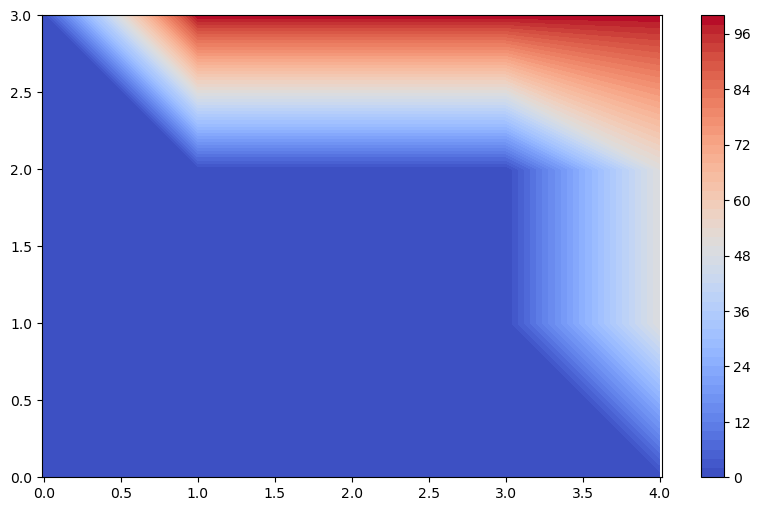

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# We will work with the case: Delta x = Delta y = Delta

xmin=0
xmax=4
ymin=0
ymax=3
Delta = 1


Nx = int((xmax-xmin)/Delta)
Ny = int((ymax-ymin)/Delta)

x=np.linspace(xmin,xmax,Nx)
y=np.linspace(ymin,ymax,Ny)
x = x[1:Nx-1]  # We only use interior points
y = y[1:Ny-1]  # We only use interior points
Nx-=1
Ny-=1
N = Nx*Ny

# The matrix A should have dimension N x N
# The vector b should have dimension N
#
# TODO: Use this space to create your matrix A and vector b

A = np.zeros((N, N))
b = np.zeros(N)

def index_ij(i, j):
    """
    Convert the 2D grid coordinate (i, j) to a linear subscript for locating in A, b.
    Assume i corresponds to the x direction (length Nx) and j corresponds to the y direction (length Ny).
    """
    return j * Nx + i
for j in range(Ny):
    for i in range(Nx):
        row = index_ij(i, j)
        A[row, row] = -4.0
        if i + 1 < Nx:
            A[row, index_ij(i+1, j)] = 1.0
        if i - 1 >= 0:
            A[row, index_ij(i-1, j)] = 1.0
        if j + 1 < Ny:
            A[row, index_ij(i, j+1)] = 1.0
        if j - 1 >= 0:
            A[row, index_ij(i, j-1)] = 1.0



# End creation of A and b

# Solve the linear system
sol = np.linalg.solve(A,b);
sol = sol.reshape(Ny, Nx).T


# Put the edges back in the graph
# u is the matrix with the temperatures going all the way to the edges

Nx+=2  # add both left and right edge points
Ny+=2  # add both bottom and top edge points
u = np.zeros([Nx,Ny])

for i in range(1,Nx-1):
    #u[i,j] = 0
    for j in range(1,Ny-1):
        u[i,j] = sol[i-1,j-1]
    u[i,Ny-1] = 100
for j in range(1,Ny):
    u[Nx-1,j] = 50
u[Nx-1,Ny-1] = 100
# u[0,Ny-1] = 100


# Plot the temperatures as different colours

x=np.linspace(xmin,xmax,Nx)
y=np.linspace(ymin,ymax,Ny)
[mX,mY] = np.meshgrid(x,y)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Add space for the pie chart

nlevels=50
plt.contourf(mX,mY,u.T, nlevels, cmap=cm.coolwarm);
plt.colorbar();
plt.axis('equal');

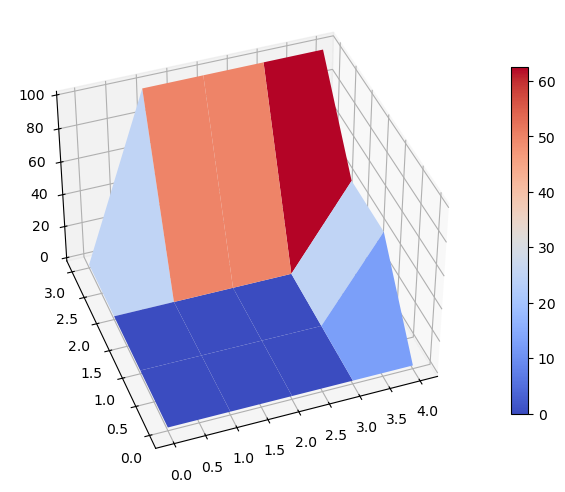

In [17]:
# Plot the temperatures as different heights

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 6))

# # Calculate the profit function at all values we are going to plot
# Z = profit(X,Y)
surf=ax.plot_surface(mX,mY,u.T,cmap=cm.coolwarm);
ax.view_init(40, -110);
fig.colorbar(surf, shrink=0.75);

## 15 *(Bonus)* Approximating the temperature of a two-dimensional slab


**Q8:**  
   Recall that for a one‐dimensional derivative, Euler’s method approximates  
   $$[
   y'(t_n) \;\approx\; \frac{y(t_{n+1}) - y(t_n)}{\Delta t}.
   ]$$  
   By analogy, we can create finite‐difference approximations for the second partial derivatives \(u_{xx}\) and \(u_{yy}\). For instance, along the \(x\)‐direction:
   $$[
   u_{xx}(x_i, y_j) 
   \;\approx\; \frac{u_{i+1,j} - 2\,u_{i,j} + u_{i-1,j}}{\Delta x^2},
   \]
   and similarly along \(y\):
   \[
   u_{yy}(x_i, y_j) 
   \;\approx\; \frac{u_{i,j+1} - 2\,u_{i,j} + u_{i,j-1}}{\Delta y^2}.
   ]$$


**Q9**  
   Let $$(0 \le x \le L)$$ and $$(0 \le y \le H)$$. We divide the domain into a grid of points:
   $$[
   x_i = i\,\Delta x,\quad y_j = j\,\Delta y,
   ]$$
   for $$(i = 0,1,\dots, N_x)$$ and $$(j = 0,1,\dots, N_y)$$. The interior points have indices $$(1 \le i \le N_x-1), (1 \le j \le N_y-1)$$. Then $$(u_{i,j}\approx u(x_i,y_j))$$.


**Q10**  
   Since the steady‐state heat equation is $$(u_{xx} + u_{yy} = 0)$$, we discretize both partial derivatives and combine them:
   $$[
   \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} 
   \;+\; \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2} = 0.
   ]$$
   Rearranging gives a finite‐difference equation involving $$(u_{i,j})$$ and its neighbors.


**Q11**  
   Because this is a steady‐state problem, we end up with a system of linear equations in the unknown interior values $$(u_{i,j})$$. For example, if
   $$[
   u(0,y) = 0,\quad u(L,y)=50,\quad u(x,0)=0,\quad u(x,H)=100,
   ]$$
   we know the boundary points exactly. The interior unknowns form a system $$(A\mathbf{u} = \mathbf{b})$$.


**Q12**
We can label the interior points $$(p_0, p_1, \dots)$$ and write the discrete equations accordingly. For a small grid, this might lead to a system of size $$(6\times 6)$$ or similar, depending on the domain subdivisions.

